# CASE 2 - Capstone Webscrapping using BeautifulSoup

Di dalam program ini , kita mencoba untuk webscrapping data dari halaman https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31, di sini kita mencoba untuk mengambil data list film di imdb.com yang tayang di 2019, Setelah itu coba untuk menganalisa dan memvisualisasikan dalam bentuk chart di halaman web yang akan kita bikin, di mana resultnya berupa plot chart dari 7 film terpopuler di 2019.



Pertama kita untuk membuat koneksi ke halaman web hhttps://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31 sekaligus menyalin data htmlnya ke komputer lokal

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

Kemudian kita check datanya, apakah sudah sesuai dengan html webpage nya, akan tetapi bentuknya masih belum terstruktur

In [2]:
url_get.content[1:777]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t'

Karena bentuknya belum terstruktur maka kita membutuhkan library `BeautifulSoup` untuk mem-parser datanya supaya lebih tertata dan datanya di simpan di variable soup

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Setelah itu kita mencoba untuk mencari data yang di butuhkan dalam hal kita mencoba mengambil data Title ,Rating,MetaScore,Votes. Yang pertama di cari adalah main class yang menyimpan semua informasi di atas 

In [4]:
results = soup.find_all('div', attrs={'class':'lister-item-content'})
print(results[:5000])

[<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt1312171/">The Umbrella Academy</a>
<span class="lister-item-year text-muted unbold">(2019– )</span>
</h3>
<p class="text-muted">
<span class="runtime">60 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Comedy            </span>
</p>
<div class="ratings-bar">
<div class="inline-block ratings-imdb-rating" data-value="8" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>8.0</strong>
</div>
<div class="inline-block ratings-user-rating">
<span class="userRatingValue" data-tconst="tt1312171" id="urv_tt1312171">
<span class="global-sprite rating-star no-rating"></span>
<span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
</span>
<div class="starBarWidget" id="sb_tt1312171">
<div class="rating rating-list" data-auth="" data-ga-identifier="" data-starbar-c

Kemudian kita find semua series data yang kita butuhkan, di sini kita bisa find berdasarkan parameter html masing masing data

In [5]:
records = []  
for result in results:  
    title = result.find('a').text
    title = title.strip()
    rating = result.find('strong').text
    rating = rating.strip()
    if (result.find('span', attrs={'class':'metascore favorable'}) is not None):
        meta = result.find('span', attrs={'class':'metascore favorable'}).text
    elif (result.find('span', attrs={'class':'metascore mixed'}) is not None):
        meta = result.find('span', attrs={'class':'metascore mixed'}).text
    else:
        meta = '0'
    meta = meta.strip()
    vote = result.find('span', attrs={'name':'nv'}).text
    vote = vote.strip()
    
    records.append((title, rating, meta, vote))
records

[('The Umbrella Academy', '8.0', '0', '112,893'),
 ('The Boys', '8.7', '0', '157,060'),
 ('Knives Out', '7.9', '82', '360,810'),
 ('Watchmen', '8.1', '0', '74,598'),
 ('Euphoria', '8.3', '0', '44,587'),
 ('In the Dark', '7.4', '0', '4,882'),
 ('Doom Patrol', '8.0', '0', '28,463'),
 ('For All Mankind', '7.5', '0', '9,465'),
 ('The Mandalorian', '8.7', '0', '182,018'),
 ('The Gentlemen', '7.9', '51', '170,337'),
 ('Hanna', '7.5', '0', '22,558'),
 ('The Witcher', '8.2', '0', '264,205'),
 ('Once Upon a Time... in Hollywood', '7.7', '83', '498,566'),
 ('Yes, God, Yes', '5.9', '71', '1,928'),
 ('His Dark Materials', '7.9', '0', '36,723'),
 ('Joker', '8.5', '59', '838,012'),
 ('Gisaengchung', '8.6', '96', '457,919'),
 ('After', '5.4', '0', '29,703'),
 ('Motherless Brooklyn', '6.8', '60', '33,328'),
 ('Avengers: Endgame', '8.4', '78', '746,119'),
 ('Ford v Ferrari', '8.1', '81', '243,770'),
 ('What We Do in the Shadows', '8.5', '0', '28,741'),
 ('How to Sell Drugs Online (Fast)', '7.9', '0', '

Proses scrapping selesai, di sini akan di lanjutkan dengan  EDA (Exploratory Data Analisis), yang di lakukan pertama tentunya merubah array menjadi dataframe

In [6]:
import pandas as pd

df = pd.DataFrame(records, columns = ('Title','Rating','MetaScore','Votes'))
df.head()

,Title,Rating,MetaScore,Votes
0,The Umbrella Academy,8.0,0,"112,893"
1,The Boys,8.7,0,"157,060"
2,Knives Out,7.9,82,"360,810"
3,Watchmen,8.1,0,"74,598"
4,Euphoria,8.3,0,"44,587"


Kemudian kita lakukan cleansing data dengan memperbaiki isi data ( replace , dengan . pada angka), kemudian kita rubah type data masing masing series, di sini saya juga coba tambahkan kolom popularity di mana popularity adalah perkalian jumlah votes dengan ratingnya, sehingga assumsinya jika votesnya banyak dan ratingny bagus maka film tersebut populer

In [7]:
df['Votes']=df['Votes'].str.replace(',','').astype('float64')
df['Rating']=df['Rating'].astype('float64')
df['MetaScore']=df['MetaScore'].astype('int64')
df['Popularity']=df['Votes']*(df['Rating']/10)+df['MetaScore']


Kemudian kita lakukan visualisasi data menggunakan bar chart, di mana kita membandingkan rating, jumlah votes dan popularity di urutkan berdasarkan nilai terbesar

<AxesSubplot:xlabel='Title'>

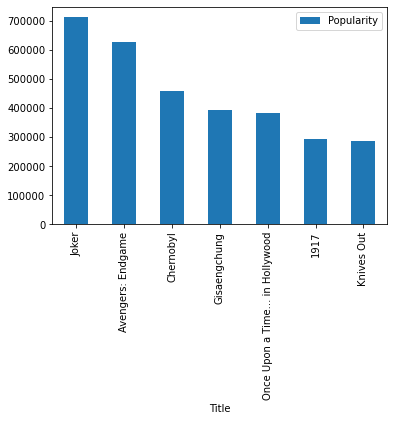

In [8]:
df.pivot_table(index='Title',values='Popularity', aggfunc= sum).sort_values('Popularity',ascending=False).head(7).plot.bar()

<AxesSubplot:xlabel='Title'>

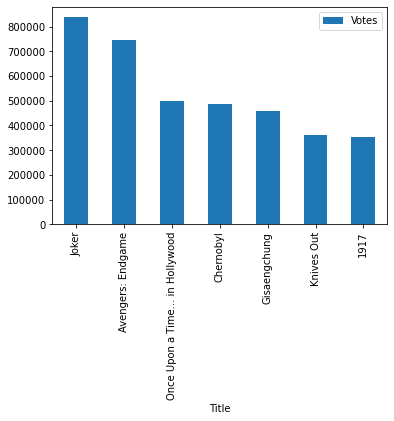

In [9]:
df.pivot_table(index='Title',values='Votes', aggfunc= sum).sort_values('Votes',ascending=False).head(7).plot.bar()

<AxesSubplot:xlabel='Title'>

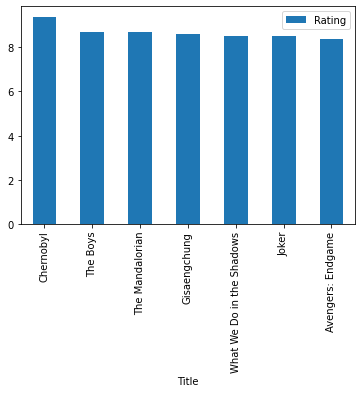

In [10]:
df.pivot_table(index='Title',values='Rating', aggfunc= sum).sort_values('Rating',ascending=False).head(7).plot.bar()

In [11]:
df.head()

,Title,Rating,MetaScore,Votes,Popularity
0,The Umbrella Academy,8.0,0,112893.0,90314.40
1,The Boys,8.7,0,157060.0,136642.20
2,Knives Out,7.9,82,360810.0,285121.90
3,Watchmen,8.1,0,74598.0,60424.38
4,Euphoria,8.3,0,44587.0,37007.21


Setelah di lakukan scrapping dan visualisasi terlihat bahwa ada 7 film terlaris berdasarkan jumlah votes dan ratingnya yakni :
    - Joker
    - Avenger End Game
    - Once Upon a Time... in Hollywood
    - Chernobyl
    - Gisaengchung
    - Knives Out
    - 1917

    berarti film film tersebut yang kami rekomendasikan untuk di tonton
    
Kesimpulannya :
untuk mendapatkan data dari web kita cukup menggunakan library beautifulsoup4 dengan memasukan beberapa kata kunci dalam pencarian data yang mau di scrapping